# CSE 252A Computer Vision I Fall 2023 - Assignment 4

Instructor: Ben Ochoa

Due: Wed, Dec 6, 11:59 PM

**Name:** Siddharth Nahar

**PID:** A59023789

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu).

- All the solutions must be written in this Jupyter notebook.

- You may use basic algebra packages (e.g., `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

- **You must submit 3 files on Gradescope - `.pdf` , `.ipynb` and `.py` file where the .py file is the conversion of your .ipynb to .py file . You must mark each problem on Gradescope in the pdf.** 
    To convert the notebook to PDF, you can choose one way below:

    1. You can print the web page and save as PDF (e.g., Chrome: Right click the web page $\rightarrow$ Print... $\rightarrow$ Choose "Destination: Save as PDF" and click "Save").

    2. You can find the export option in the header: File $\rightarrow$ Download as $\rightarrow$ "PDF via LaTeX"

    To convert the notebook (.ipynb) to .py file use the following command:

<center> jupyter nbconvert --to script filename.ipynb --output output_filename.py </center>

- Please make sure the content in each cell (e.g., code, output images, printed results, etc.) are clearly visible and are not cut-out or partially cropped in your final PDF file.

- While submitting on gradescope, please make sure to assign the relevant pages in your PDF submission for each problem.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

## Problem 1: Machine Learning [28 pts]

In this problem, you will implement several machine learning solutions for computer vision problems.

### Problem 1.1: Initial Setup

We will use [Scikit-learn (Sklearn)](https://scikit-learn.org/stable/) module in for this problem. It is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib. 

Get started by installing the Sklearn module.

In [85]:
import sklearn
sklearn.__version__

'1.3.1'

### Problem 1.2: Download MNIST data [3 pts]

The [MNIST database](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology database) is a well-known dataset consisting of 28x28 grayscale images of handwritten digits. For this problem, we will use Sklearn to do machine learning classification on the MNIST database.

Sklearn provides a lower-resolution MNIST database with 8x8 pixel images of digits. The `images` attribute of the dataset stores 8x8 arrays of grayscale values for each image. The `target` attribute of the dataset stores the digit each image represents. Complete `plot_mnist_sample()` to plot a 2x5 figure, where each grid displays a sample image from a category. The following image gives an example:
<!-- <img src="./fig/eg_mnist.PNG" alt="drawing" width="400"/> -->
![mnist](fig/eg_mnist.PNG) 

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [87]:
# Download MNIST Dataset from Sklearn
digits = datasets.load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [88]:
def plot_mnist_sample(digits):
    """
    This function plots a sample image for each category,
    The result is a figure with 2x5 grid of images.
    
    """
    plt.figure(figsize=(8, 5))
    """ ==========
    YOUR CODE HERE
    ========== """
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
        plt.title("Train: " + str(digits.target[i]))
        plt.axis("off")

    plt.show()
    

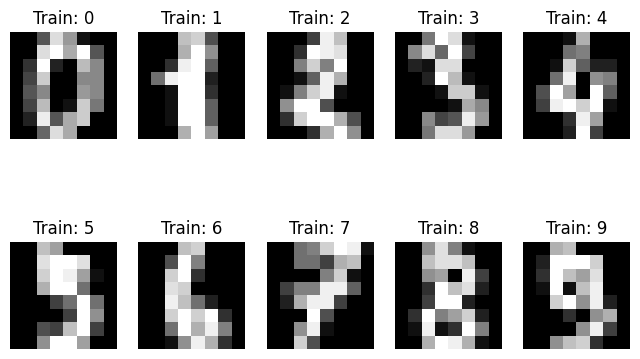

In [89]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results.

plot_mnist_sample(digits)

### Problem 1.3: Recognizing hand-written digits with Sklearn [5 pts]

One of the most amazing things about the Sklearn library is that it provides an easy way to build and call different models. In this part, we will get experience with  `LogisticRegressionClassifier` and `kNNClassifier`.

In [90]:
# DO NOT CHANGE
#### Some helper functions are given below####
def DataBatch(data, label, batchsize, shuffle=True):
    """
    This function provides a generator for batches of data that 
    yields data (batchsize, 3, 32, 32) and labels (batchsize)
    if shuffle, it will load batches in a random order
    """
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]

def test(testData, testLabels, classifier):
    """
    Call this function to test the accuracy of a classifier
    """
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize,shuffle=False):
        prediction = classifier(data)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100

In [91]:
# DO NOT CHANGE
# Split data into 90% train and 10% test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.images.reshape((len(digits.images), -1)), digits.target, test_size=0.1, shuffle=False)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

class RandomClassifier():
    """
    This is a sample classifier. 
    given an input it outputs a random class
    """
    def __init__(self, classes=10):
        self.classes=classes
    def __call__(self, x):
        return np.random.randint(self.classes, size=x.shape[0])
    
class LogisticRegressionClassifier():
    def __init__(self, sol='liblinear'):
        """
        Initialize Logistic Regression model.
        
        Inputs:
        sol: Solver method that the Logistic Regression model would use for optimization
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.model = LogisticRegression(solver=sol)
        
    def train(self, trainData, trainLabels):
        """
        Train your model with image data and corresponding labels.
        
        Inputs:
        trainData: Training images (N,64)
        trainLabels: Labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.model.fit(trainData, trainLabels)
        
    def __call__(self, x):
        """
        Predict the trained model on test data.

        Inputs:
        x: Test images (N,64)

        Returns:
        predicted labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        return self.model.predict(X=x)
       
    
class kNNClassifier():
    def __init__(self, k=3, algorithm='brute'):
        """
        Initialize KNN model.
        
        Inputs:
        k: number of neighbors involved in voting
        algorithm: Algorithm used to compute nearest neighbors
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.model = KNeighborsClassifier(n_neighbors=k, algorithm=algorithm)
        
        
    def train(self, trainData, trainLabels):
        """
        Train your model with image data and corresponding labels.
        
        Inputs:
        trainData: Training images (N,64)
        trainLabels: Labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.model.fit(trainData, trainLabels)
       
        
    def __call__(self, x):
        """
        Predict the trained model on test data.

        Inputs:
        x: Test images (N,64)

        Returns:
        predicted labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        return self.model.predict(X=x)
        

In [93]:
# TEST CODE: DO NOT CHANGE
randomClassifierX = RandomClassifier()
print ('Random classifier accuracy: %f'%test(X_test, y_test, randomClassifierX))

Random classifier accuracy: 8.888889


In [94]:
# TEST CODE: DO NOT CHANGE
# TEST LogisticRegressionClassifier

lrClassifierX = LogisticRegressionClassifier()
lrClassifierX.train(X_train, y_train)
print ('Logistic Regression Classifier classifier accuracy: %f'%test(X_test, y_test, lrClassifierX))

Logistic Regression Classifier classifier accuracy: 93.888889


In [95]:
# TEST kNNClassifier
""" ==========
YOUR CODE HERE
========== """
knnClassifierX = kNNClassifier()
knnClassifierX.train(X_train, y_train)
print ('K Nearest Neighbour Classifier classifier accuracy: %f'%test(X_test, y_test, knnClassifierX))

K Nearest Neighbour Classifier classifier accuracy: 96.666667


### Problem 1.4: Confusion Matrix [5 pts]

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Here you will implement a function that computes the confusion matrix for a classifier. The matrix (M) must be $n \times n$ where $n$ is the number of classes. Entry `M[i,j]` must contain the fraction of images of class `i` that was classified as class `j`. The following example shows the confusion matrix for the `RandomClassifier`. Your task is to plot the results for `LogisticRegressionClassifier` and `kNNClassifier`.
<!-- <img src="./fig/eg_confusion.PNG" alt="drawing" width="250"/> -->
![confusion](fig/eg_confusion.PNG) 

In [96]:
from tqdm import tqdm

def Confusion(testData, testLabels, classifier):
    batchsize=50
    correct=0
    M=np.zeros((10,10))
    num=testData.shape[0]/batchsize
    count=0
    acc=0
    
    for data,label in tqdm(DataBatch(testData,testLabels,batchsize,shuffle=False),total=len(testData)//batchsize):
        """ ==========
        YOUR CODE HERE
        ========== """
        pred = classifier(data)
        for index in range(len(pred)):
            M[label[index], pred[index]] += 1
            if label[index] == pred[index]:
                acc += 1  
    
    # create confusion matrix
    for i in range(10):
        M[i] /= np.sum(M[i])
    
    return M,acc*100.0/len(testData)

def VisualizeConfussion(M):
    plt.figure(figsize=(14, 6))
    plt.imshow(M)
    plt.show()
    print(np.round(M,2))

4it [00:00, 7463.17it/s]             


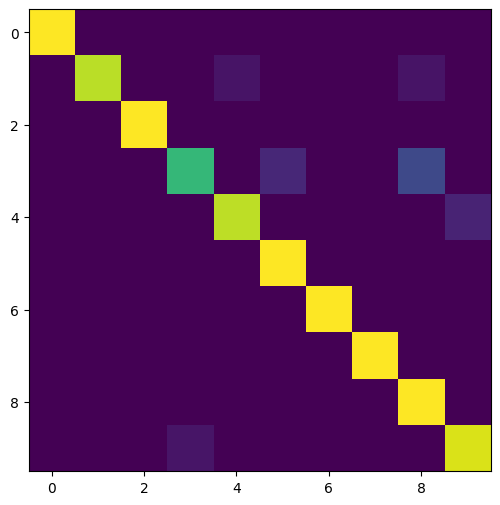

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.89 0.   0.   0.05 0.   0.   0.   0.05 0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.67 0.   0.11 0.   0.   0.22 0.  ]
 [0.   0.   0.   0.   0.9  0.   0.   0.   0.   0.1 ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.06 0.   0.   0.   0.   0.   0.94]]


In [97]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST LogisticRegressionClassifier

M,acc = Confusion(X_test, y_test, lrClassifierX)
VisualizeConfussion(M)

4it [00:00, 542.81it/s]              


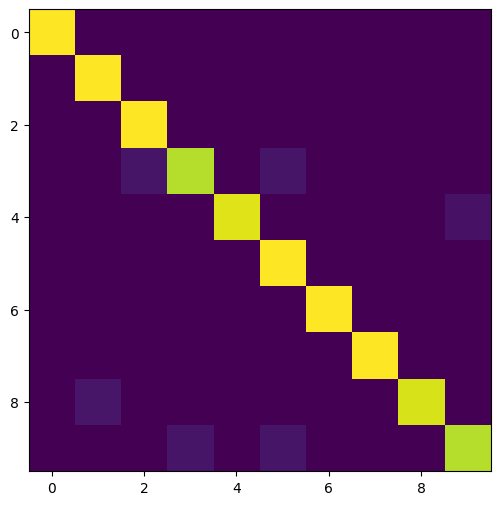

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.06 0.89 0.   0.06 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.06 0.   0.   0.   0.   0.   0.   0.94 0.  ]
 [0.   0.   0.   0.06 0.   0.06 0.   0.   0.   0.89]]


In [98]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST kNNClassifier

M,acc = Confusion(X_test, y_test, knnClassifierX)
VisualizeConfussion(M)

### Problem 1.5: K-Nearest Neighbors (KNN) [7 pts]

For this problem, you will complete a simple kNN classifer without Sklearn. The distance metric is Euclidean distance (L2 norm) in pixel space. You may use the `np.linalg.norm` function to compute distance. $k$ refers to the number of neighbors involved in voting on the class. 

In [99]:
class kNNClassifierManual():
    def __init__(self, k=3):
        self.k=k

    def train(self, trainData, trainLabels):
        self.X_train = trainData
        self.y_train = trainLabels
        
    def __call__(self, X):
        """
        Predict the labels for the input data using KNN method.

        Inputs:
        X: Test images (N,64)

        Returns:
        predicted labels (N,)
        """
        predictions = []

        for x_test in X:
            distances = np.linalg.norm(self.X_train - x_test, axis=1) # Get the L2 norm for training data from test point
            k_nearest_indices = np.argsort(distances)[:self.k] # Sort the distances and get the indices of trainset
            unique_labels, counts = np.unique(self.y_train[k_nearest_indices], return_counts=True) # Get the lables and get the count of max labels
            predictions.append(unique_labels[np.argmax(counts)])
        return np.array(predictions)
        

In [100]:
# TEST/PLOT CODE: DO NOT CHANGE
# TEST kNNClassifierManual

knnClassifierManualX = kNNClassifierManual()
knnClassifierManualX.train(X_train, y_train)
print ('KNN classifier accuracy: %f'%test(X_test, y_test, knnClassifierManualX))

KNN classifier accuracy: 96.666667


### Problem 1.6: Principal Component Analysis (PCA) K-Nearest Neighbors (KNN) [8 pts]
Here you will implement a simple KNN classifer in PCA space (for k=3 and 25 principal components).
You must implement PCA yourself using SVD (you may not use sklearn.decomposition.PCA
or any other package that directly implements PCA transformations)

You may use your previous implementation of the KNN classifier in this part.

#### Compare runtimes
Is the testing time for PCA KNN classifier more or less than that for KNN classifier? Comment on why it differs if it does.

In [101]:
class PCAKNNClassifer():
    def __init__(self, components=25, k=3):
        """
        Initialize PCA kNN classifier

        Inputs:
        components: number of principal components
        k: number of neighbors involved in voting
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        self.components = components
        self.knnClassifier = kNNClassifierManual(k=k)
        
    def train(self, trainData, trainLabels):
        """
        Train your model with image data and corresponding labels.
        
        Inputs:
        trainData: Training images (N,64)
        trainLabels: Labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        _, _, Vt = np.linalg.svd(np.cov(trainData.T))
        self.proj = Vt[ : self.components].T
        train_pca = np.dot(trainData, self.proj)
        self.knnClassifier.train(train_pca, trainLabels)

    def __call__(self, x):
        """
        Predict the trained model on test data.

        Inputs:
        x: Test images (N,64)

        Returns:
        predicted labels (N,)
        """
        """ ==========
        YOUR CODE HERE
        ========== """
        xtest_pca = np.dot(x, self.proj)
        return self.knnClassifier(xtest_pca)
       

# test your classifier with only the first 100 training examples (use this
# while debugging)
pcaknnClassiferX = PCAKNNClassifer()
pcaknnClassiferX.train(X_train[:100], y_train[:100])
print ('PCA KNN classifier accuracy: %f'%test(X_test, y_test, pcaknnClassiferX))

PCA KNN classifier accuracy: 85.000000


  0%|          | 0/3 [00:00<?, ?it/s]

4it [00:00, 84.34it/s]               


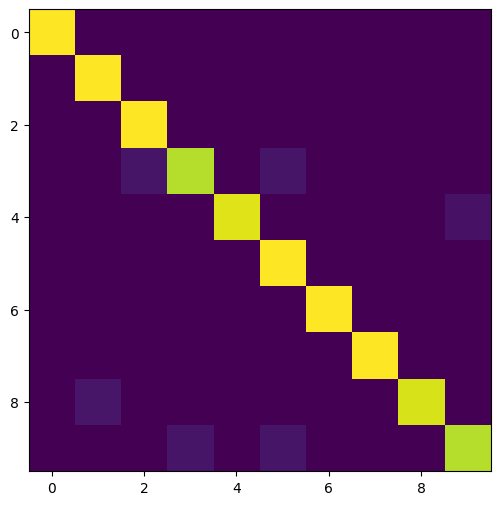

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.06 0.89 0.   0.06 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.   0.   0.   0.   0.05]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.06 0.   0.   0.   0.   0.   0.   0.94 0.  ]
 [0.   0.   0.   0.06 0.   0.06 0.   0.   0.   0.89]]
PCA KNN classifier accuracy: 96.666667


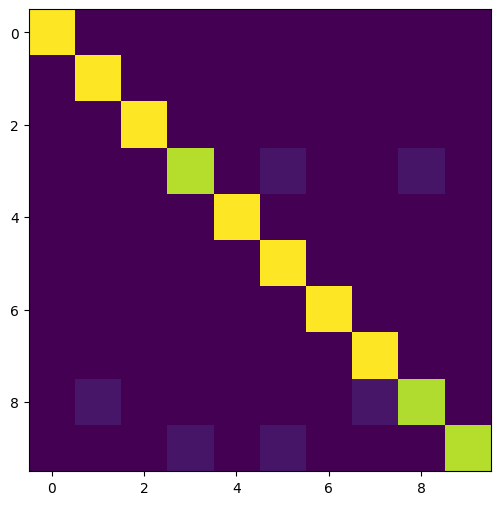

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.89 0.   0.06 0.   0.   0.06 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.06 0.   0.   0.   0.   0.   0.06 0.88 0.  ]
 [0.   0.   0.   0.06 0.   0.06 0.   0.   0.   0.89]]


In [102]:
# test your classifier with all the training examples
pcaknnClassifer = PCAKNNClassifer()
pcaknnClassifer.train(X_train, y_train)
# display confusion matrix for your PCA KNN classifier with all the training examples
""" ==========
YOUR CODE HERE
========== """
M_pca,acc_pca = Confusion(X_test, y_test, pcaknnClassifer)
VisualizeConfussion(M)

print ('PCA KNN classifier accuracy: %f'%acc_pca)
VisualizeConfussion(M_pca)

#### Comments of PCA vs kNN running time

The testing time for the PCA KNN classifier is generally expected to be less than that for the KNN classifier without PCA. This is because PCA reduces the dimensionality of the data by capturing the most important features, leading to a smaller feature space. The reduced dimensionality often results in faster computation times for distance calculations and other operations in the kNN algorithm.

## Problem 2: Deep learning [28 pts]


### Problem 2.1 Initial setup [1 pts]

Follow the directions on https://pytorch.org/get-started/locally/ to install Pytorch on your computer. 

Note: You will not need GPU support for this assignment so don't worry if you don't have one. Furthermore, installing with GPU support is often more difficult to configure so it is suggested that you install the CPU only version. TA's will not provide any support related to GPU or CUDA.

Run the torch import statements below to verify your instalation.



In [103]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable

x = torch.rand(5, 3)
print(x)

tensor([[0.3654, 0.3092, 0.4690],
        [0.3943, 0.4967, 0.8316],
        [0.7749, 0.6954, 0.7353],
        [0.1627, 0.2043, 0.8719],
        [0.2076, 0.0822, 0.9124]])


In this problem, we will use the full dataset of MNIST database with 28x28 pixel images of digits.

Download the MNIST data from http://yann.lecun.com/exdb/mnist/.

Download the 4 zipped files, extract them into one folder, and change the variable 'path' in the code below. (Code taken from https://gist.github.com/akesling/5358964 )

Plot one random example image corresponding to each label from training data.

In [104]:
import os
import struct

# Change path as required
path = "./mnist/"

def read(dataset = "training", datatype='images'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset == "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    if(datatype=='images'):
        get_data = lambda idx: img[idx]
    elif(datatype=='labels'):
        get_data = lambda idx: lbl[idx]

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_data(i)
        
X_train=np.array(list(read('training','images')))
y_train=np.array(list(read('training','labels')))
X_test=np.array(list(read('testing','images')))
y_test=np.array(list(read('testing','labels')))

In [105]:
def plot_mnist_sample_high_res(X_train, y_train):
    """
    This function plots a sample image for each category,
    The result is a figure with 2x5 grid of images.
    
    """
    plt.figure(figsize=(8, 5))
    """ ==========
    YOUR CODE HERE
    ========== """
    for i in range(10):
        x = X_train[np.where(y_train == i)[0][0]]
        plt.subplot(2, 5, i+1)
        plt.imshow(x, cmap='gray')
        plt.title("Train: " + str(i))
        plt.axis("off")

    plt.show()

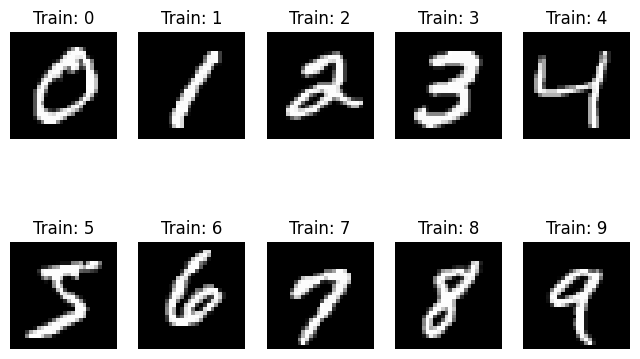

In [106]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results.

plot_mnist_sample_high_res(X_train, y_train)

### Problem 2.2:  Training with PyTorch [8 pts]
Below is some helper code to train your deep networks. 
Complete the train function for DNN below. 

You must write down the training operations in this function. That means, for a batch of data you have to initialize the gradients, forward propagate the data, compute error, do back propagation and finally update the parameters. You would have to choose an appropriate loss function and optimizer from PyTorch for this problem.

This function will be used in the following questions with different networks.
You can look at https://pytorch.org/tutorials/beginner/pytorch_with_examples.html for reference.



In [107]:
# base class for your deep neural networks. It implements the training loop (train_net).


import torch.nn.init
import torch.optim as optim
from torch.autograd import Variable
from torch.nn.parameter import Parameter
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from scipy.stats import truncnorm

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
    
    def forward(self, x):
        raise NotImplementedError
    
    def train_net(self, X_train, y_train, epochs=1, batchSize=50):
        """ ==========
        YOUR CODE HERE
        ========== """
        lossFn = torch.nn.CrossEntropyLoss()
        optimFn = optim.Adam(self.parameters(), lr=0.0005)
        train_dl = DataLoader(TensorDataset(torch.tensor(X_train, dtype=torch.float),
                                            torch.tensor(y_train, dtype=torch.long)),
                                            batch_size=batchSize)
        for epoch in range(epochs):
            for xb, yb in train_dl:
                optimFn.zero_grad()
                pred = self.forward(xb)
                loss = lossFn(pred, yb)

                loss.backward()
                optimFn.step()
            print("Epoch : ", epoch, " Loss : ", lossFn(self.forward(xb), yb))
        
    
    def __call__(self, x):
        inputs = Variable(torch.FloatTensor(x))
        prediction = self.forward(inputs)
        return np.argmax(prediction.data.cpu().numpy(), 1)

# helper function to get weight variable
def weight_variable(shape):
    initial = torch.Tensor(truncnorm.rvs(-1/0.01, 1/0.01, scale=0.01, size=shape))
    return Parameter(initial, requires_grad=True)

# helper function to get bias variable
def bias_variable(shape):
    initial = torch.Tensor(np.ones(shape)*0.1)
    return Parameter(initial, requires_grad=True)

In [108]:
# example linear classifier - input connected to output
# you can take this as an example to learn how to extend DNN class
class LinearClassifier(DNN):
    def __init__(self, in_features=28*28, classes=10):
        super(LinearClassifier, self).__init__()
        # in_features=28*28
        self.weight1 = weight_variable((classes, in_features))
        self.bias1 = bias_variable((classes))
    
    def forward(self, x):
        # linear operation
        y_pred = torch.addmm(self.bias1, x.view(list(x.size())[0], -1), self.weight1.t())
        return y_pred


X_train=np.float32(np.expand_dims(X_train,-1))/255
X_train=X_train.transpose((0,3,1,2))

X_test=np.float32(np.expand_dims(X_test,-1))/255
X_test=X_test.transpose((0,3,1,2))

In [109]:
# test the example linear classifier (note you should get around 90% accuracy
# for 10 epochs and batchsize 50)
linearClassifier = LinearClassifier()
linearClassifier.train_net(X_train, y_train, epochs=10)

print ('Linear classifier accuracy: %f'%test(X_test, y_test, linearClassifier))

Epoch :  0  Loss :  tensor(0.2361, grad_fn=<NllLossBackward0>)
Epoch :  1  Loss :  tensor(0.1535, grad_fn=<NllLossBackward0>)
Epoch :  2  Loss :  tensor(0.1302, grad_fn=<NllLossBackward0>)
Epoch :  3  Loss :  tensor(0.1196, grad_fn=<NllLossBackward0>)
Epoch :  4  Loss :  tensor(0.1134, grad_fn=<NllLossBackward0>)
Epoch :  5  Loss :  tensor(0.1092, grad_fn=<NllLossBackward0>)
Epoch :  6  Loss :  tensor(0.1061, grad_fn=<NllLossBackward0>)
Epoch :  7  Loss :  tensor(0.1037, grad_fn=<NllLossBackward0>)
Epoch :  8  Loss :  tensor(0.1018, grad_fn=<NllLossBackward0>)
Epoch :  9  Loss :  tensor(0.1003, grad_fn=<NllLossBackward0>)
Linear classifier accuracy: 92.560000


100%|██████████| 200/200 [00:00<00:00, 12121.21it/s]


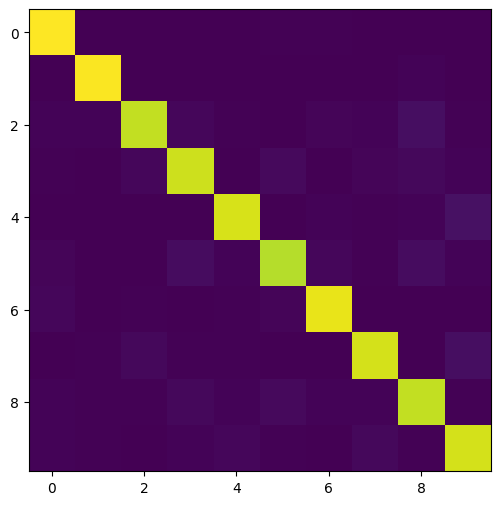

[[0.98 0.   0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.01 0.  ]
 [0.01 0.01 0.89 0.02 0.01 0.   0.01 0.01 0.04 0.  ]
 [0.   0.   0.02 0.91 0.   0.02 0.   0.01 0.02 0.01]
 [0.   0.   0.   0.   0.92 0.   0.01 0.   0.01 0.04]
 [0.01 0.   0.   0.03 0.01 0.88 0.02 0.01 0.03 0.01]
 [0.02 0.   0.01 0.   0.01 0.01 0.95 0.   0.   0.  ]
 [0.   0.   0.02 0.01 0.01 0.   0.   0.92 0.   0.04]
 [0.01 0.01 0.01 0.02 0.01 0.03 0.01 0.01 0.89 0.01]
 [0.01 0.01 0.   0.01 0.02 0.01 0.   0.02 0.01 0.92]]
Linear classifier accuracy: 92.560000


In [110]:
# display confusion matrix
""" ==========
YOUR CODE HERE
========== """
M_lc, a_lc = Confusion(X_test, y_test, linearClassifier)
VisualizeConfussion(M_lc)

print ('Linear classifier accuracy: %f'%a_lc)

### Problem 2.3:  Visualizing Weights (Single Layer Perceptron) [3 pts]
The simple linear classifier implemented in the cell already performs quite well. Plot the filter weights corresponding to each output class (weights, not biases) as images. (Normalize weights to lie between 0 and 1 and use color maps like 'inferno' or 'plasma' for good results). Comment on what the weights look like and why that may be so.


Neural: 0


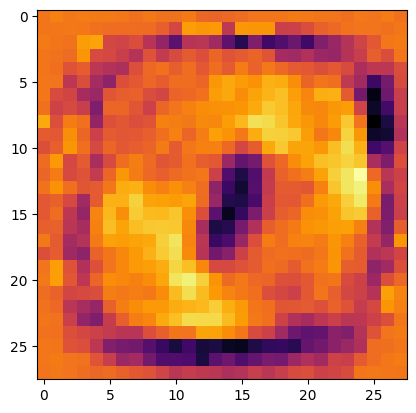

Neural: 1


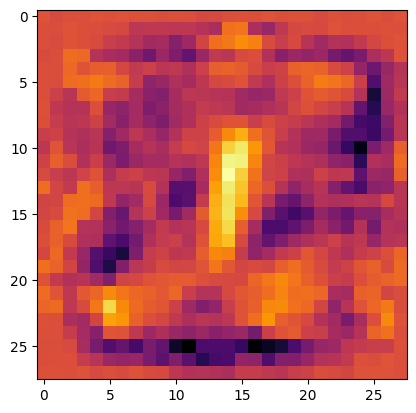

Neural: 2


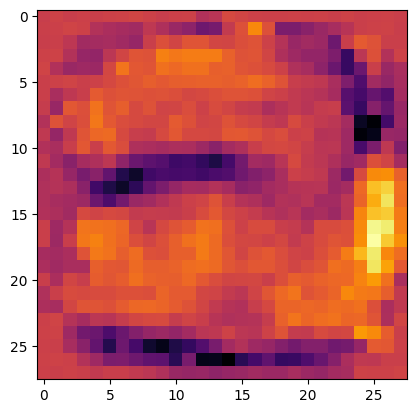

Neural: 3


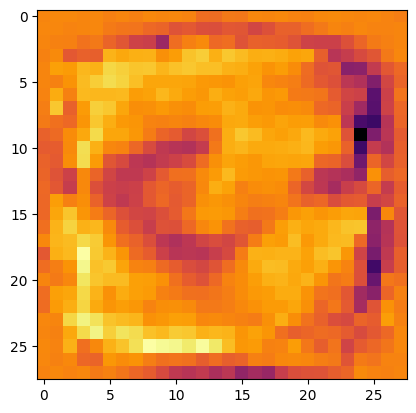

Neural: 4


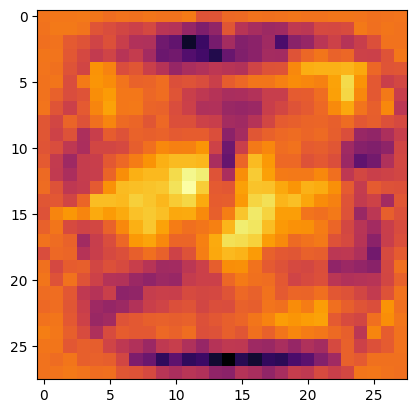

Neural: 5


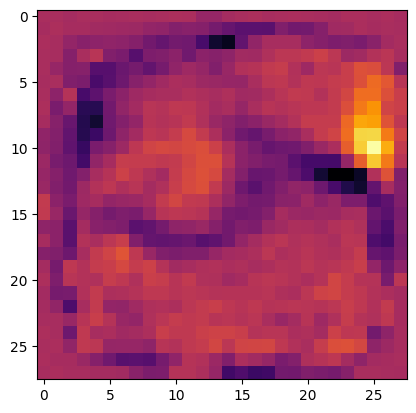

Neural: 6


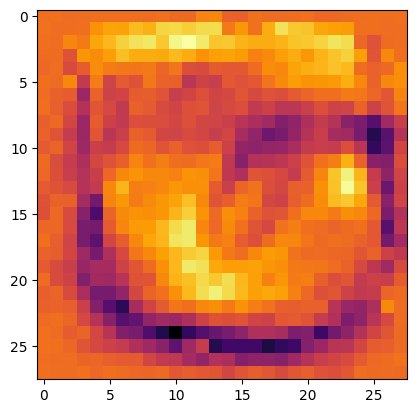

Neural: 7


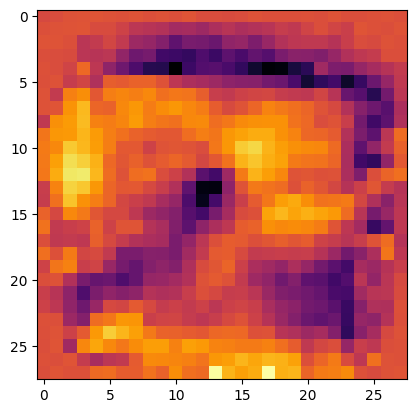

Neural: 8


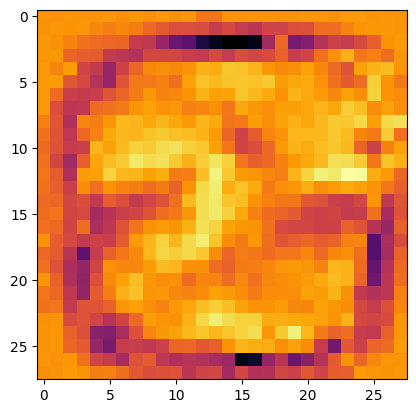

Neural: 9


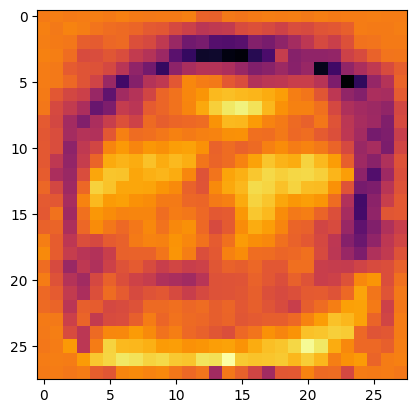

In [111]:
# Plot filter weights corresponding to each class, you may have to reshape them to make sense out of them
# linearClassifier.weight1.data will give you the first layer weights
""" ==========
YOUR CODE HERE
========== """
for i in range(10):
    print("Neural: {}".format(i))
    weight = linearClassifier.weight1.data[i]
    weight = (weight-weight.min())/(weight.max()-weight.min())
    plt.imshow(weight.reshape(28, 28), cmap='inferno')
    plt.show()


#### Comments on weights

1. As we can see weights of corresponding label take the shape of actual number that it is going to predict because each specific weight corresponding to label has learnt to give high activation when it encounters a certain index.
2. So when we multiply weights with input data, it provides activation of the particular label. So weights start taking the shape of number itself.


### Problem 2.4: Multi Layer Perceptron (MLP) [8 pts]
Here you will implement an MLP. The MLP must consist of 2 layers (weight multiplication and bias offset) that map to the following feature dimensions:

* 28x28 -> hidden (50)
* hidden (50) -> classes

* The hidden layer must be followed with a ReLU nonlinearity. The final layer must not have a nonlinearity applied as we desire the raw logits output.
* The final output of the computation graph must be stored in self.y as that will be used in the training.

Display the confusion matrix and accuracy after training. Note: You should get ~95 % accuracy for 10 epochs and batch size 50.

Plot the filter weights corresponding to the mapping from the inputs to the first 10 hidden layer outputs (out of 50). Do the weights look similar to the weights plotted in the previous problem? Why or why not?

It is expected that the training model would take a few minutes to run.

In [112]:
class MLPClassifer(DNN):
    def __init__(self, in_features=28*28, classes=10, hidden=50):
        """
        Initialize weight and bias variables
        """
        super(MLPClassifer, self).__init__()
        """ ==========
        YOUR CODE HERE
        ========== """
        self.weight1 = weight_variable((hidden, in_features))
        self.bias1 = bias_variable((hidden))
        self.weight2 = weight_variable((classes, hidden))
        self.bias2 = bias_variable((classes))
        
    def forward(self, x):
        """ ==========
        YOUR CODE HERE
        ========== """
        layer1 = F.relu(torch.addmm(self.bias1, x.view(list(x.size())[0], -1), self.weight1.t()))
        y = torch.addmm(self.bias2, layer1, self.weight2.t())
        return y
       

mlpClassifer = MLPClassifer()
mlpClassifer.train_net(X_train, y_train, epochs=10, batchSize=50)

Epoch :  0  Loss :  tensor(0.1499, grad_fn=<NllLossBackward0>)
Epoch :  1  Loss :  tensor(0.1119, grad_fn=<NllLossBackward0>)
Epoch :  2  Loss :  tensor(0.0915, grad_fn=<NllLossBackward0>)
Epoch :  3  Loss :  tensor(0.0696, grad_fn=<NllLossBackward0>)
Epoch :  4  Loss :  tensor(0.0539, grad_fn=<NllLossBackward0>)
Epoch :  5  Loss :  tensor(0.0440, grad_fn=<NllLossBackward0>)
Epoch :  6  Loss :  tensor(0.0365, grad_fn=<NllLossBackward0>)
Epoch :  7  Loss :  tensor(0.0304, grad_fn=<NllLossBackward0>)
Epoch :  8  Loss :  tensor(0.0258, grad_fn=<NllLossBackward0>)
Epoch :  9  Loss :  tensor(0.0220, grad_fn=<NllLossBackward0>)


100%|██████████| 200/200 [00:00<00:00, 10294.03it/s]

MLP classifier accuracy: 96.520000


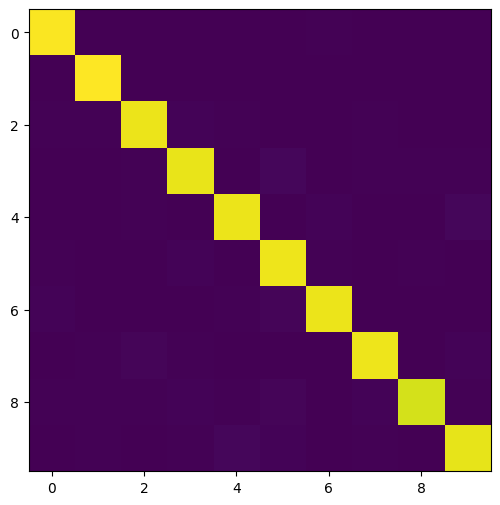

[[0.99 0.   0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.96 0.01 0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.96 0.   0.02 0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.96 0.   0.01 0.   0.   0.02]
 [0.   0.   0.   0.01 0.   0.97 0.01 0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.01 0.96 0.   0.   0.  ]
 [0.   0.01 0.01 0.   0.   0.   0.   0.96 0.   0.01]
 [0.01 0.01 0.01 0.01 0.01 0.02 0.   0.01 0.93 0.01]
 [0.   0.01 0.   0.01 0.02 0.01 0.   0.01 0.   0.95]]


In [113]:
# Plot confusion matrix
M_mlp,acc_mlp = Confusion(X_test, y_test, mlpClassifer)
print ('MLP classifier accuracy: %f'%acc_mlp)
VisualizeConfussion(M_mlp)

Neural Hidden layer: 0


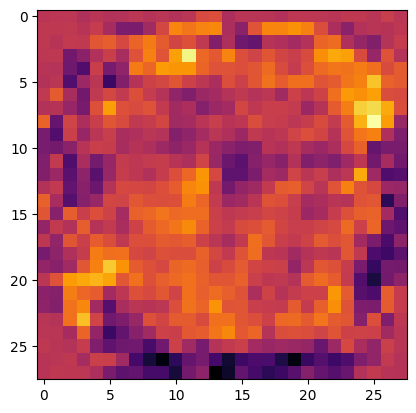

Neural Hidden layer: 1


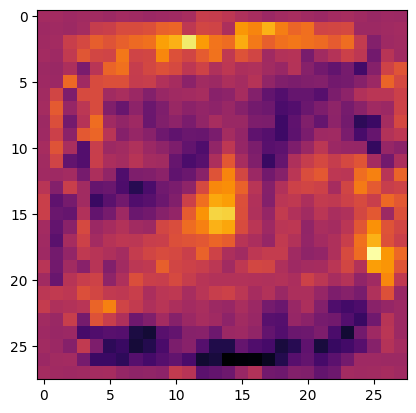

Neural Hidden layer: 2


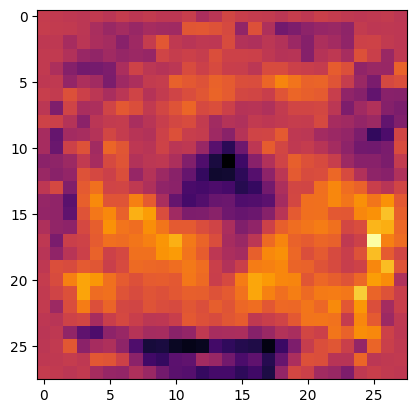

Neural Hidden layer: 3


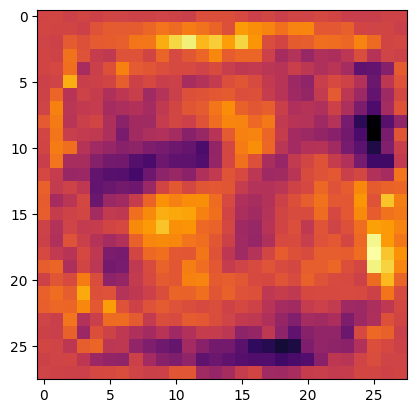

Neural Hidden layer: 4


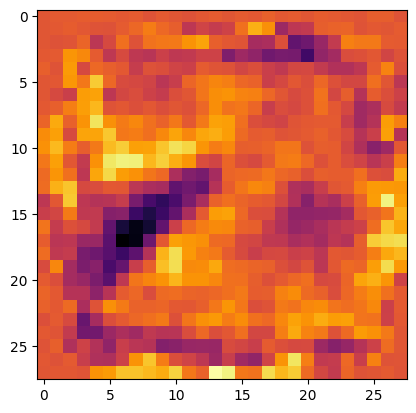

Neural Hidden layer: 5


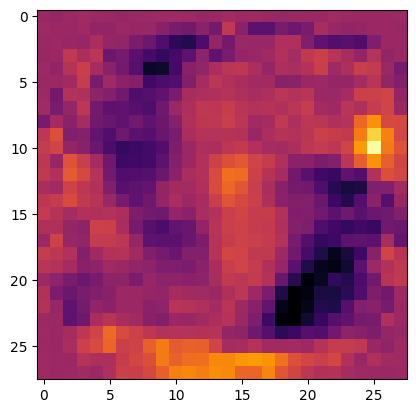

Neural Hidden layer: 6


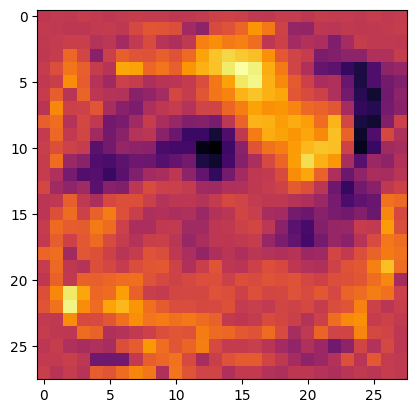

Neural Hidden layer: 7


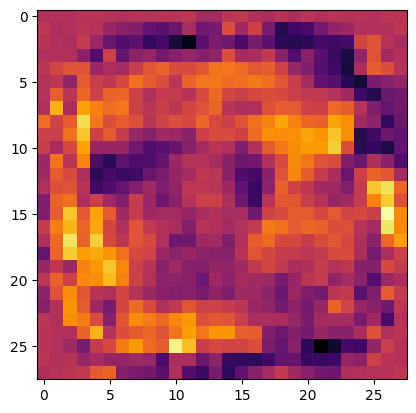

Neural Hidden layer: 8


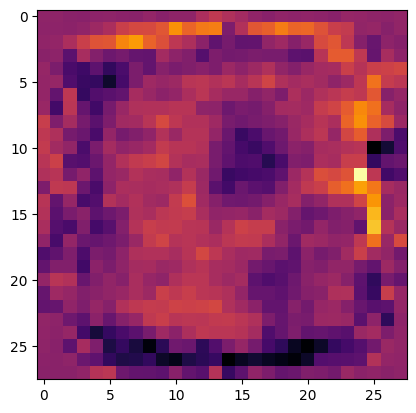

Neural Hidden layer: 9


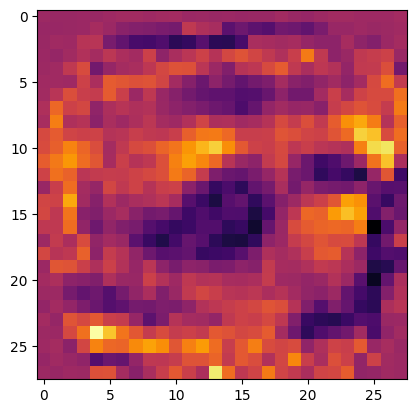

In [114]:
# Plot filter weights
""" ==========
YOUR CODE HERE
========== """
for i in range(10):
    print("Neural Hidden layer: {}".format(i))
    weight = mlpClassifer.weight1.data[i]
    weight = (weight-weight.min())/(weight.max()-weight.min())
    plt.imshow(weight.reshape(28, 28), cmap='inferno')
    plt.show()

#### Comments on weights

1. No, the weights don't look similar to the weight plotted in the single layer perceptron. This is because we have 50 neurons in first layer, and each neuron learns certian feature of a specific number and not exactly the number which was the case in previous problem.
2. Weights here tries to learn combination of features for numbers and then combine them in final layer to map to numbers.

### Problem 2.5: Convolutional Neural Network (CNN) [8 pts]
Here you will implement a CNN with the following architecture:

* n=10
* ReLU( Conv(kernel_size=5x5, stride=2, output_features=n) )
* ReLU( Conv(kernel_size=5x5, stride=2, output_features=n*2) )
* ReLU( Linear(hidden units = 64) )
* Linear(output_features=classes)

So, 2 convolutional layers, followed by 1 fully connected hidden layer and then the output layer

Display the confusion matrix and accuracy after training. You should get around ~98 % accuracy for 10 epochs and batch size 50.<br><br>
**Note: You are not allowed to use torch.nn.Conv2d() and torch.nn.Linear(), Using these will lead to deduction of points. Use the declared conv2d(), weight_variable() and bias_variable() functions.** Although, in practice, when you move forward after this class you will use torch.nn.Conv2d() which makes life easier and hides all the operations underneath.

In [115]:
def conv2d(x, W, stride, bias=None):
    # x: input
    # W: weights (out, in, kH, kW)
    return F.conv2d(x, W, bias, stride=stride, padding=2)

# Defining a Convolutional Neural Network
class CNNClassifer(DNN):
    def __init__(self, classes=10, n=5):
        super(CNNClassifer, self).__init__()
        """ ==========
        YOUR CODE HERE
        ========== """
        self.weights_cnn1 = weight_variable((n, 1, 5, 5))
        self.bias_cnn1 = bias_variable((n,))
        self.weights_cnn2 = weight_variable((n*2, n, 5, 5))
        self.bias_cnn2 = bias_variable((n*2,))
        self.weights_cnn3 = weight_variable((64, n*2*7*7))
        self.bias_cnn3 = bias_variable((64,))
        self.weights_cnn4 = weight_variable((classes, 64))
        self.bias_cnn4 = bias_variable((classes,))
       
    def forward(self, x):
        """ ==========
        YOUR CODE HERE
        ========== """
        relu1 = F.relu(conv2d(x, self.weights_cnn1, stride=2, bias=self.bias_cnn1))
        relu2 = F.relu(conv2d(relu1, self.weights_cnn2, stride=2, bias=self.bias_cnn2))
        layer3 = F.relu(torch.addmm(self.bias_cnn3, relu2.view(list(relu2.size())[0], -1), self.weights_cnn3.t()))
        y = torch.addmm(self.bias_cnn4, layer3, self.weights_cnn4.t())
        return y
    
    
cnnClassifer = CNNClassifer(n=10)
cnnClassifer.train_net(X_train, y_train, epochs=10, batchSize=50)

Epoch :  0  Loss :  tensor(0.0444, grad_fn=<NllLossBackward0>)
Epoch :  1  Loss :  tensor(0.0161, grad_fn=<NllLossBackward0>)
Epoch :  2  Loss :  tensor(0.0102, grad_fn=<NllLossBackward0>)
Epoch :  3  Loss :  tensor(0.0076, grad_fn=<NllLossBackward0>)
Epoch :  4  Loss :  tensor(0.0063, grad_fn=<NllLossBackward0>)
Epoch :  5  Loss :  tensor(0.0060, grad_fn=<NllLossBackward0>)
Epoch :  6  Loss :  tensor(0.0051, grad_fn=<NllLossBackward0>)
Epoch :  7  Loss :  tensor(0.0049, grad_fn=<NllLossBackward0>)
Epoch :  8  Loss :  tensor(0.0046, grad_fn=<NllLossBackward0>)
Epoch :  9  Loss :  tensor(0.0036, grad_fn=<NllLossBackward0>)


100%|██████████| 200/200 [00:00<00:00, 260.58it/s]


MLP classifier accuracy: 98.380000


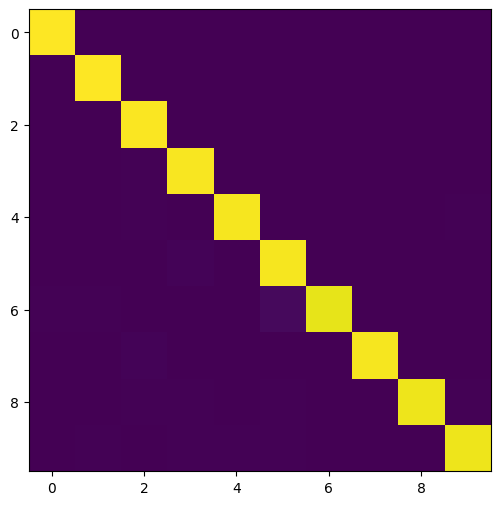

[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.98 0.   0.   0.   0.   0.01]
 [0.   0.   0.   0.01 0.   0.98 0.   0.   0.   0.  ]
 [0.01 0.01 0.   0.   0.   0.03 0.96 0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.   0.   0.98 0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.   0.97 0.  ]
 [0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.97]]


In [116]:
# Plot confusion matrix and print the test accuracy of the classifier
""" ==========
YOUR CODE HERE
========== """
# Plot confusion matrix
M_cnn,acc_cnn = Confusion(X_test, y_test, cnnClassifer)
print ('MLP classifier accuracy: %f'%acc_cnn)
VisualizeConfussion(M_cnn)

* Note that the MLP/ConvNet approaches lead to an accuracy a little higher than the K-NN approach. 
* In general, Neural net approaches lead to significant increase in accuracy, but in this case since the problem is not too hard, the increase in accuracy is not very high.
* However, this is still quite significant considering the fact that the ConvNets we've used are relatively simple while the accuracy achieved using K-NN is with a search over 60,000 training images for every test image.
* You can look at the performance of various machine learning methods on this problem at http://yann.lecun.com/exdb/mnist/
* You can learn more about neural nets/ pytorch at<br> https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
* You can play with a demo of neural network created by Daniel Smilkov and Shan Carter at https://playground.tensorflow.org/